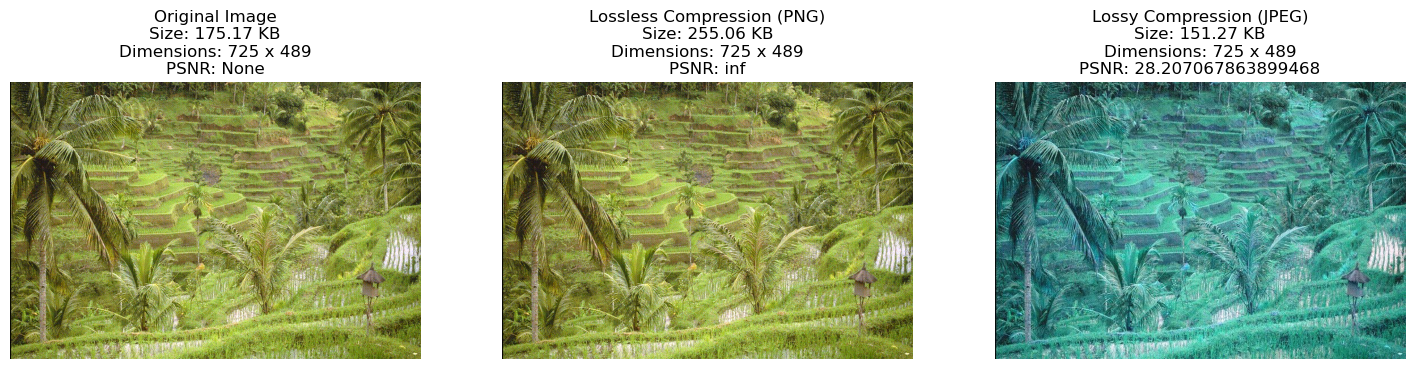

In [2]:
import cv2
import os
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

# Load and convert the image
image = cv2.cvtColor(cv2.imread('Bali.tif'), cv2.COLOR_BGR2RGB)

# Save images with lossless (PNG) and lossy (JPEG) compression
Image.fromarray(image).save('compressed_image_lossless.png', format='PNG', optimize=True)
cv2.imwrite('compressed_image_lossy.jpg', image, [int(cv2.IMWRITE_JPEG_QUALITY), 80])

# Load compressed images
image_lossless = cv2.cvtColor(cv2.imread('compressed_image_lossless.png'), cv2.COLOR_BGR2RGB)
image_lossy = cv2.cvtColor(cv2.imread('compressed_image_lossy.jpg'), cv2.COLOR_BGR2RGB)

# Get file sizes and dimensions
get_size = lambda path: os.path.getsize(path) / 1024
dimensions = f"{image.shape[1]} x {image.shape[0]}"

# Calculate PSNR
mse = lambda original, compressed: np.mean((original - compressed) ** 2)
psnr = lambda original, compressed: 20 * np.log10(255.0 / np.sqrt(mse(original, compressed))) if mse(original, compressed) else float('inf')

# Plot original, lossless, and lossy images with details
plt.figure(figsize=(18, 8))
titles = [
    'Original Image',
    'Lossless Compression (PNG)',
    'Lossy Compression (JPEG)'
]
images = [image, image_lossless, image_lossy]
sizes = [get_size('Bali.tif'), get_size('compressed_image_lossless.png'), get_size('compressed_image_lossy.jpg')]
psnr_values = [None, psnr(image, image_lossless), psnr(image, image_lossy)]

for idx in range(3):
    plt.subplot(1, 3, idx + 1)
    plt.title(f'{titles[idx]}\nSize: {sizes[idx]:.2f} KB\nDimensions: {dimensions}\nPSNR: {psnr_values[idx]}')
    plt.imshow(images[idx])
    plt.axis('off')

plt.show()
